# Laboratory 15

## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

#### Remember where we left our last laboratory session (Lab14)? 

![](https://media.tumblr.com/tumblr_mbui1kpPoU1rxdw8g.gif)

#### Accept my gratitude if you do! But in case you saw Agent K and Agent J sometime after Tuesday or for any other reason, do not recall it, here is where were we left things:
#### We had a csv file (lab14_E1data.csv) dataset with two sets of numbers (Set 1 and Set2). We did a bunch of stuff and decided that the Normal Distribution Data Model provides a good fit for both of sample sets. We, then used the right parameters for Normal Data Model (mean and standard deviation) to generate one new sample set based on each set. We then looked at the four sets next to each other and asked a rather simple question: Are these sets different or similar?
#### While we reached some assertions based on visual assessment, we did not manage to solidify our assertation in any numerical way. Well, now is the time! 

In [1]:
#Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Previously ...
data = pd.read_csv("lab14_E1data.csv") 
set1 = np.array(data['Set1'])
set2 = np.array(data['Set2'])
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)
data2 = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})


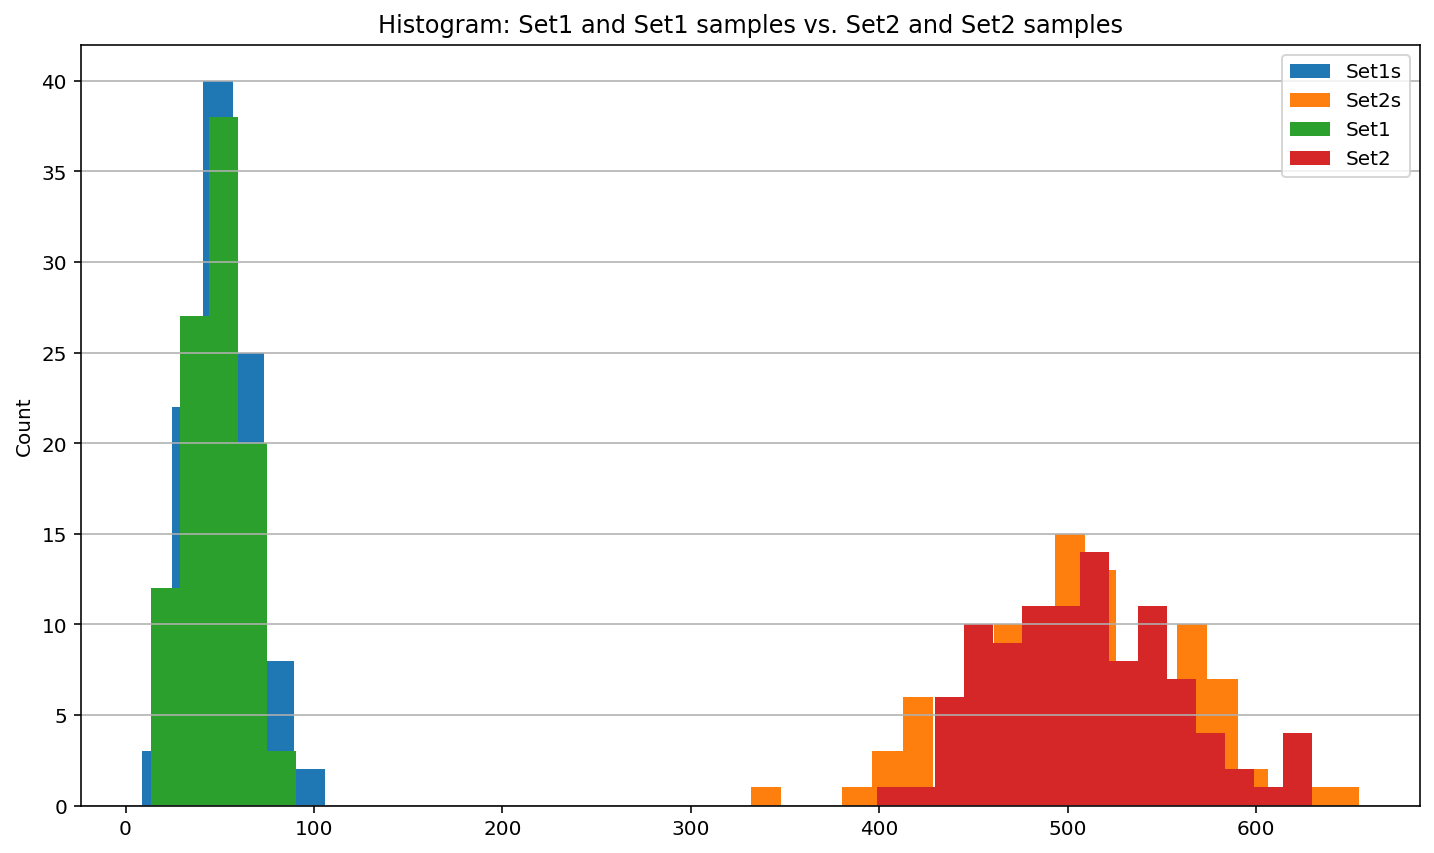

In [8]:
#Previously ...
fig, ax = plt.subplots()
data2.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

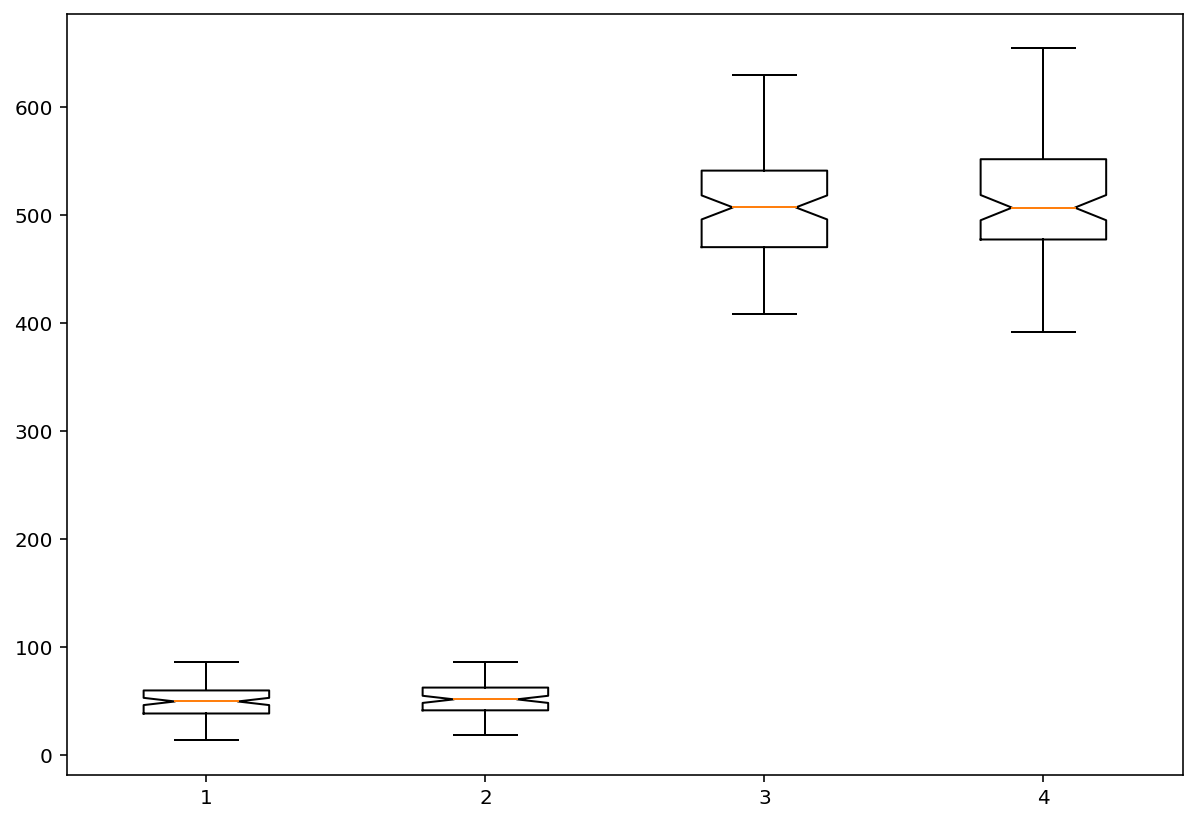

In [9]:
#Previously ...
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

__We can use statistical hypothesis tests to confirm that our sets are from Normal Distribution Data Models. We can use the Shapiro-Wilk Normality Test:__

In [16]:
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro

stat, p = shapiro(data['Set1'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.992, p=0.793
Probably Gaussian


In [17]:
# the Shapiro-Wilk Normality Test for set2
from scipy.stats import shapiro

stat, p = shapiro(data['Set2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.981, p=0.151
Probably Gaussian


In [18]:
# the Shapiro-Wilk Normality Test for set1s
from scipy.stats import shapiro

stat, p = shapiro(data2['Set1s'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.987, p=0.438
Probably Gaussian


In [19]:
# the Shapiro-Wilk Normality Test for set2s
from scipy.stats import shapiro

stat, p = shapiro(data2['Set2s'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.991, p=0.709
Probably Gaussian


__Now let's confirm that set1 and set1_s are from the same distribution. We can use the Mann-Whitney U Test for this:__

In [20]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data2['Set1s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4485.000, p-value at rejection =0.104
Probably the same distribution


__Let's also confirm that set2 and set2_s are from the same distribution:__

In [21]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set2'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4781.000, p-value at rejection =0.297
Probably the same distribution


__Based on the results we can say set1 and set1_s probably belong to the same distrubtion. The same can be stated about set2 and set2_s. Now let's check and see if set1 and set2 are SIGNIFICANTLY different or not?__

In [22]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data['Set2'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__The test's result indicate that the set1 and set2 belong to distirbutions with different measures of central tendency (means). We can check the same for set1_s and set2_s as well:__

In [23]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data2['Set1s'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__Now we can state at a 95% confidence level that set1 and set2 are different. The same for set1s and set2s.__

### Exercise 1:
- __*From previous lab:*__<br>
    - __Read the "lab14_E2data.csv" file as a dataset.__<br>
    - __Use the Tukey Plotting Position Formula and fit a Normal and a LogNormal distribution data model. Visually assess which one provides a better fit for each set__<br>
    - __Use the best distribution data model and a create two sample sets (one for each set) with 1000 values.__<br>
- __*For this lab:*__<br>
    - __Step1: Define a dataset with the original sets and the sampled sets (four columns).__<br>
    - __Step2: Use a normality test and based on the result decide whether each set belongs to a normal distribution data model or not.__<br>
    - __Step3: Use a parametric statistical hypothesis testing and confirm whether the sets are significantly different or not (three comparisons in total).__<br>
    - __Step4: Use a nonparametric statistical hypothesis testing and confirm whether the sets are significantly different or not (three comparisons in total).__<br> 

In [1]:
#From previous lab:


In [2]:
#For this lab:
#step1:


In [3]:
#step2:


In [4]:
#step3:


In [5]:
#step4:
